In [2]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [0]:
# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [7]:
# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
hist = model.fit(x_train, y_train, epochs=3000, batch_size=10, validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 413us/step - loss: 2.2780 - accuracy: 0.1443 - val_loss: 2.2515 - val_accuracy: 0.1933
Epoch 2/3000
700/700 [==============================] - 0s 127us/step - loss: 2.1983 - accuracy: 0.2357 - val_loss: 2.1935 - val_accuracy: 0.2167
Epoch 3/3000
700/700 [==============================] - 0s 136us/step - loss: 2.1330 - accuracy: 0.2314 - val_loss: 2.1433 - val_accuracy: 0.2267
Epoch 4/3000
700/700 [==============================] - 0s 130us/step - loss: 2.0774 - accuracy: 0.2386 - val_loss: 2.1000 - val_accuracy: 0.2267
Epoch 5/3000
700/700 [==============================] - 0s 132us/step - loss: 2.0237 - accuracy: 0.2371 - val_loss: 2.0588 - val_accuracy: 0.2433
Epoch 6/3000
700/700 [==============================] - 0s 130us/step - loss: 1.9798 - accuracy: 0.2457 - val_loss: 2.0344 - val_accuracy: 0.2300
Epoch 7/3000
700/700 [==============================] - 0s 138us/step - loss: 

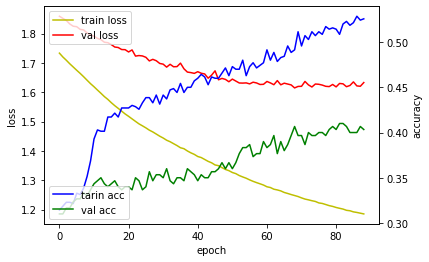

In [12]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='tarin acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 20us/step

loss : 1.8301704263687133
accuracy : 0.30889999866485596


In [11]:
# 조기종료의 patience를 추가
early_stopping = EarlyStopping(patience = 20)
hist = model.fit(x_train, y_train, epochs=3000, batch_size=10,
                 validation_data=(x_val, y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 138us/step - loss: 1.7332 - accuracy: 0.3143 - val_loss: 1.8588 - val_accuracy: 0.3100
Epoch 2/3000
700/700 [==============================] - 0s 129us/step - loss: 1.7200 - accuracy: 0.3186 - val_loss: 1.8516 - val_accuracy: 0.3100
Epoch 3/3000
700/700 [==============================] - 0s 130us/step - loss: 1.7088 - accuracy: 0.3229 - val_loss: 1.8444 - val_accuracy: 0.3167
Epoch 4/3000
700/700 [==============================] - 0s 125us/step - loss: 1.6968 - accuracy: 0.3229 - val_loss: 1.8325 - val_accuracy: 0.3167
Epoch 5/3000
700/700 [==============================] - 0s 127us/step - loss: 1.6859 - accuracy: 0.3214 - val_loss: 1.8248 - val_accuracy: 0.3233
Epoch 6/3000
700/700 [==============================] - 0s 124us/step - loss: 1.6748 - accuracy: 0.3329 - val_loss: 1.8233 - val_accuracy: 0.3267
Epoch 7/3000
700/700 [==============================] - 0s 136us/step - loss: 